In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
movies =r"D:\Jupyter Notebook\Movies.csv"
df = pd.read_csv(movies, encoding="latin1")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [26]:
df = df.dropna(subset=["Rating", "Genre"])
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce").fillna(0)
df["Duration"] = pd.to_numeric(df["Duration"].astype(str).str.extract(r"(\d+)")[0], errors="coerce").fillna(0)
df["Genre"] = df["Genre"].fillna("")

In [27]:
vectorizer = TfidfVectorizer()
genre_features = vectorizer.fit_transform(df["Genre"])

In [28]:
df["Name"] = df["Name"].astype("category").cat.codes

In [30]:
df_features = np.hstack((genre_features.toarray(), df[["Name", "Votes", "Duration"]].fillna(0).values))
df_labels = df["Rating"].values
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7817 non-null   int16  
 1   Year      7817 non-null   object 
 2   Duration  7817 non-null   float64
 3   Genre     7817 non-null   object 
 4   Rating    7817 non-null   float64
 5   Votes     7817 non-null   float64
 6   Director  7812 non-null   object 
 7   Actor 1   7707 non-null   object 
 8   Actor 2   7641 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(3), int16(1), object(6)
memory usage: 626.0+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,0,(2019),109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,1,(2019),110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,4,(1997),147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,5,(2005),142.0,"Drama, Romance, War",7.4,0.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,89,(2012),82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [31]:
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      5
Actor 1     110
Actor 2     176
Actor 3     259
dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7817 non-null   int16  
 1   Year      7817 non-null   object 
 2   Duration  7817 non-null   float64
 3   Genre     7817 non-null   object 
 4   Rating    7817 non-null   float64
 5   Votes     7817 non-null   float64
 6   Director  7812 non-null   object 
 7   Actor 1   7707 non-null   object 
 8   Actor 2   7641 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(3), int16(1), object(6)
memory usage: 626.0+ KB


In [35]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 1.5436


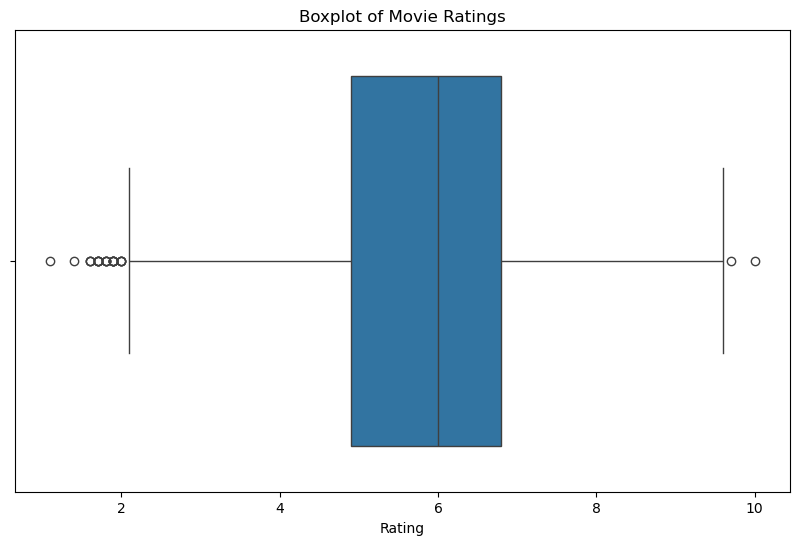

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Rating"])
plt.title("Boxplot of Movie Ratings")
plt.xlabel("Rating")
plt.show()

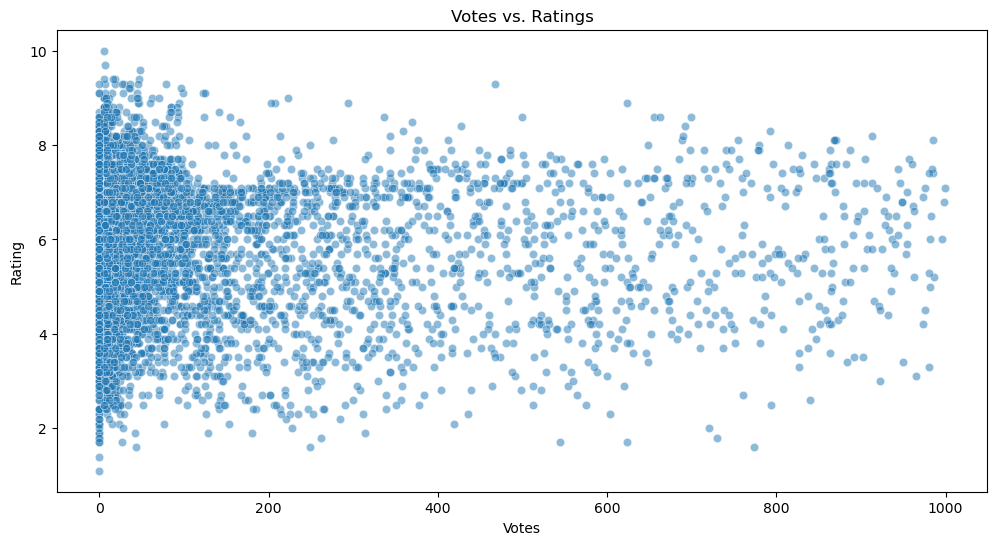

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Votes"], y=df["Rating"], alpha=0.5)
plt.title("Votes vs. Ratings")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

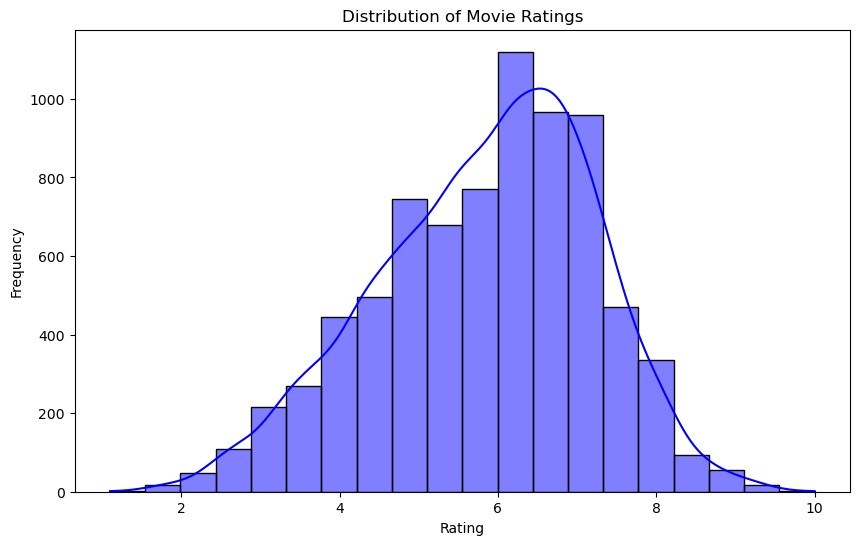

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Rating"], bins=20, kde=True, color="blue")
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [45]:
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7817 non-null   int16  
 1   Year      7817 non-null   object 
 2   Duration  7817 non-null   float64
 3   Genre     7817 non-null   object 
 4   Rating    7817 non-null   float64
 5   Votes     7817 non-null   float64
 6   Director  7812 non-null   object 
 7   Actor 1   7707 non-null   object 
 8   Actor 2   7641 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(3), int16(1), object(6)
memory usage: 626.0+ KB
None

Missing Values:
Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      5
Actor 1     110
Actor 2     176
Actor 3     259
dtype: int64


In [47]:
def predict_rating(movie_name, genre, votes=0, duration=90):
    genre_vector = vectorizer.transform([genre]).toarray()
    movie_name_encoded = np.array([[df[df['Name'] == movie_name].index[0] if movie_name in df["Name"].values else -1]])
    input_features = np.hstack((genre_vector, movie_name_encoded, [[votes, duration]]))
    predicted_rating = model.predict(input_features)
    return predicted_rating[0]

In [48]:
movie_pre = "#Yaaram"  # Change this as per dataset
example_genre = "Comedy, Romance"
example_votes = 35
example_duration = 110
movie_pre = "#Amba"  # Change this as per dataset
example_genre = "Family"
example_votes = 35
example_duration = 153
print(f"Predicted Rating: {predict_rating(movie_pre, example_genre, example_votes, example_duration):.2f}")

Predicted Rating: 5.59
